In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import StandardScaler


In [17]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
df['target'].value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

In [19]:
X = df.drop(columns='target')
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42,stratify=y)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [23]:
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
y_pred = knn.predict(X_test_scaled)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7631578947368421
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.74      0.85      0.80        41

    accuracy                           0.76        76
   macro avg       0.77      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



In [26]:
k_values = range(1, 21)
cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        X_train_scaled,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_accuracies.append(scores.mean())

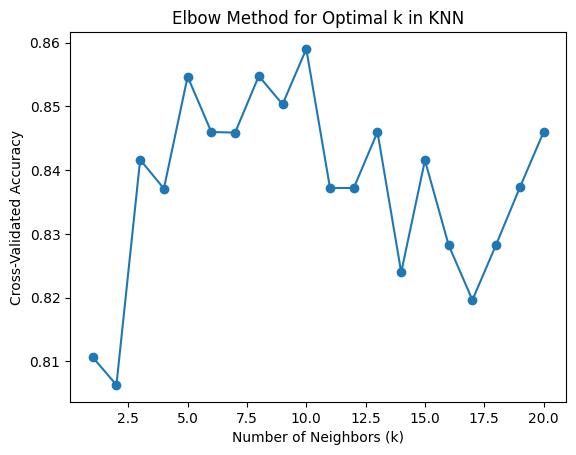

In [27]:
import matplotlib.pyplot as plt

plt.plot(k_values, cv_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Elbow Method for Optimal k in KNN")
plt.show()


In [28]:
best_k = k_values[np.argmax(cv_accuracies)]
best_k

10

In [29]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

y_pred = final_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7894736842105263